In [3]:
from pathlib import Path
import pandas as pd
import urllib.request
## Attempting to get path from url on github repo
url = "https://raw.githubusercontent.com/LittleMac24/MachineLearning/main/ds_salaries.csv"

ds_salaries_df = pd.read_csv(url)

ds_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Looking into Data Structure

This includes 
1: Checking the first instances of the data structure
    work_year = year that the employee salary was taken
    experience_level = starting entry, Midlle, expert (Categorical Variable)
    employeement_type = Full-time, Part-Time, Freelance, (Categorical)
    job_title = Title that the employee had (This makes me wonder if there is a big correllation between the job_title and the salary_in_usd)
    salary = This is the salary in the original currency (Does the original curreny matter more than the salary_in_usd?)
    salary_currency = original curreny (This does not seem important)
    salary_in_usd = label variable, this is my dependent variable that I will use for Machine Learning Multiple Regression analysis
    employee_residence = country that the employee lives
    remote_ratio = ratio of how much remote work there is
    company_location = where the company resides
    company_size = (do small companies have an effect on how much a employee is paid)

Things That I would like to look into: 
    what is r-correlation of x variables with label (salary_in_usd)? 
Potential Biases
    Salaries are majority from the US, but I want to ensure that the dataset is distributed in a manner that represents the actual population of data scientist in the world
    What if job_title is so specific that there are not any same instances? 
    


In [4]:
ds_salaries_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
ds_salaries_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
ds_salaries_df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


As you can see there is a potential problem with this dataset because it has names that are extremely specialized. Although this may be representative of the population.

In [23]:
ds_salaries_df["job_title"].value_counts()


Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [24]:
ds_salaries_df["company_location"].value_counts()


US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [25]:
ds_salaries_df["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [14]:
# print(ds_salaries_df['experience_level'].value_counts())
# print(ds_salaries_df["employee_residence"].value_counts())

#Potenial problem: The salarry currency is not consistent
print(ds_salaries_df["salary_currency"].value_counts())



USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64


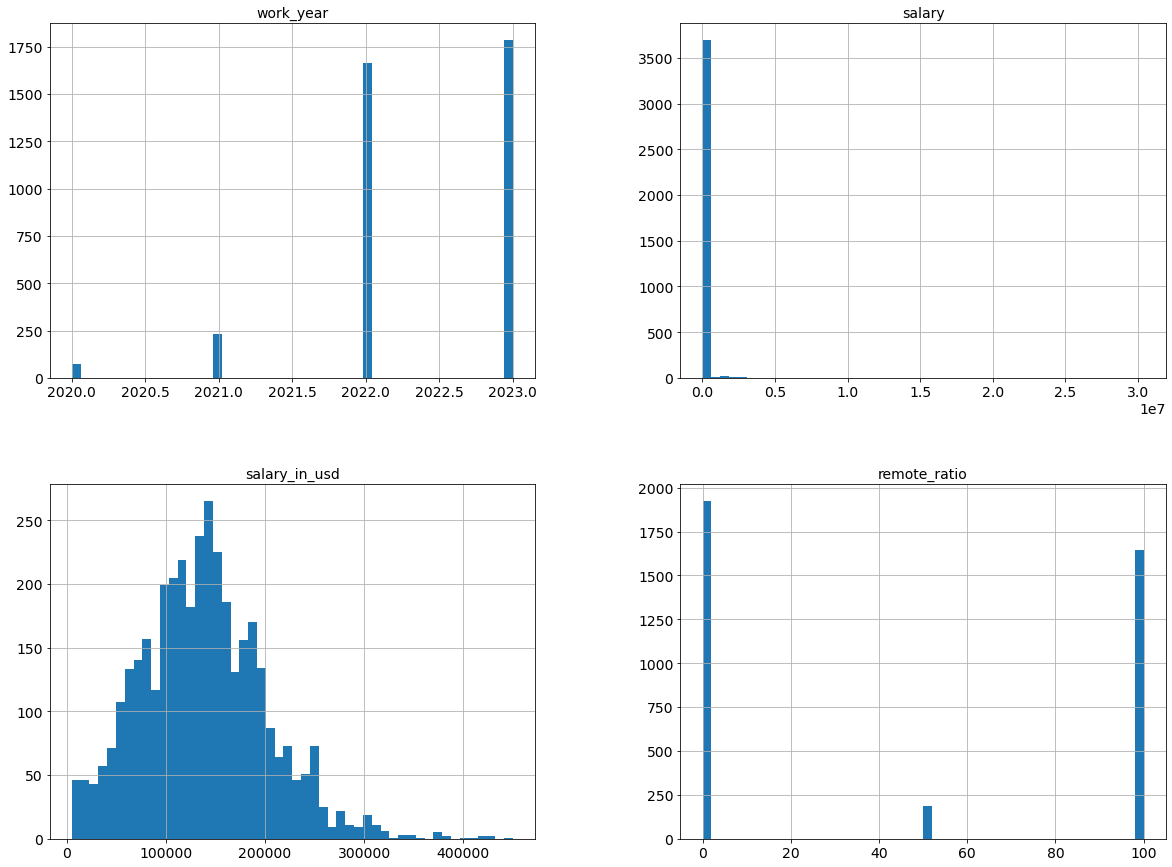

In [20]:
import matplotlib.pyplot as plt
plt.rc( "font", size=14)
plt.rc("axes", labelsize=14, titlesize = 14)
plt.rc("legend", fontsize =  10)
plt.rc("xtick, labelsize = 12")
plt.rc("ytick, labelsize = 12");
ds_salaries_df.hist(bins = 50, figsize = (20,15))
plt.show()
